In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import glob
import geopandas
import numpy as np
import cartopy.feature as cfeature
from cartopy import crs as ccrs
from shapely import geometry
from datetime import datetime

In [12]:
hs_df = geopandas.GeoDataFrame()

for day in range(1, 26):
    date_object = datetime(2019, 7, day)
    file = './output/LATE_2km_hotspot_grid_' + date_object.strftime("%Y%m%d") + '.geojson'
    temp = geopandas.read_file(file)
    temp['sat_date'] = date_object.strftime("%d/%m/%Y")
    hs_df = hs_df.append(temp)

In [13]:
hs_df.crs = {'init': 'epsg:3857'}
hs_df

,weight,geo_weight,polar_weight,adj_weight,geometry,sat_date
0,0.035000,0.000000,0.03500,0.187083,"POLYGON ((11653976.873 3348804.526, 11655976.8...",01/07/2019
1,0.035000,0.000000,0.03500,0.187083,"POLYGON ((11655976.873 3348804.526, 11657976.8...",01/07/2019
2,0.030000,0.000000,0.03000,0.173205,"POLYGON ((13027976.873 3340804.526, 13029976.8...",01/07/2019
3,0.030000,0.000000,0.03000,0.173205,"POLYGON ((13027976.873 3338804.526, 13029976.8...",01/07/2019
4,0.005376,0.005376,0.00000,0.073324,"POLYGON ((12885976.873 3328804.526, 12887976.8...",01/07/2019
5,0.005376,0.005376,0.00000,0.073324,"POLYGON ((12887976.873 3328804.526, 12889976.8...",01/07/2019
6,0.005376,0.005376,0.00000,0.073324,"POLYGON ((12885976.873 3326804.526, 12887976.8...",01/07/2019
7,0.005376,0.005376,0.00000,0.073324,"POLYGON ((12887976.873 3326804.526, 12889976.8...",01/07/2019
8,0.005376,0.005376,0.00000,0.073324,"POLYGON ((12895976.873 3318804.526, 12897976.8...",01/07/2019
9,0.005376,0.005376,0.00000,0.073324,"POLYGON ((12897976.873 3318804.526, 12899976.8...",01/07/2019


In [14]:
clip_area = geopandas.read_file('./verification/July_updated.shp')
clip_area = clip_area.to_crs({'init': 'epsg:3857'})

In [15]:
truth_df = pd.read_csv('./verification/july_ground_truth_2019.csv')

In [16]:
truth_df.drop(columns=["Unnamed: 0"], inplace=True)

In [17]:
truth_gdf = geopandas.GeoDataFrame(truth_df, geometry=geopandas.points_from_xy(truth_df.lon, truth_df.lat))

In [18]:
truth_gdf.crs = {'init' :'epsg:4326'}
truth_gdf = truth_gdf.to_crs({'init': 'epsg:3857'})

In [19]:
truth_gdf_b500 = truth_gdf.buffer(1500)

In [20]:
truth_gdf.geometry = truth_gdf_b500

In [21]:
hs_df_clipped = geopandas.overlay(clip_area, hs_df, how='intersection')
hs_df_clipped

,id,weight,geo_weight,polar_weight,adj_weight,sat_date,geometry
0,1,0.101129,0.016129,0.08500,0.318008,25/07/2019,"POLYGON ((11337976.873 20804.526, 11339976.873..."
1,1,0.032258,0.032258,0.00000,0.179605,25/07/2019,"POLYGON ((11339976.873 20804.526, 11341976.873..."
2,1,0.032258,0.032258,0.00000,0.179605,25/07/2019,"POLYGON ((11335976.873 20804.526, 11337976.873..."
3,1,0.016129,0.016129,0.00000,0.127000,25/07/2019,"POLYGON ((11341976.873 20804.526, 11343976.873..."
4,1,0.016129,0.016129,0.00000,0.127000,25/07/2019,"POLYGON ((11333976.873 20804.526, 11335976.873..."
5,1,0.472500,0.000000,0.47250,0.687386,23/07/2019,"POLYGON ((11337976.873 22804.526, 11339976.873..."
6,1,0.080645,0.080645,0.00000,0.283981,25/07/2019,"POLYGON ((11335976.873 22804.526, 11337976.873..."
7,1,0.043011,0.043011,0.00000,0.207390,25/07/2019,"POLYGON ((11333976.873 22804.526, 11335976.873..."
8,1,0.059140,0.059140,0.00000,0.243187,24/07/2019,"POLYGON ((11335976.873 22804.526, 11337976.873..."
9,1,0.361008,0.032258,0.32875,0.600839,24/07/2019,"POLYGON ((11337976.873 22804.526, 11339976.873..."


In [22]:
overlaid_gdf = geopandas.overlay(truth_gdf, hs_df_clipped, how='union')

In [23]:
overlaid_gdf.loc[overlaid_gdf['adj_weight'].isna(), 'adj_weight'] = 0
overlaid_gdf.loc[overlaid_gdf['polar_weight'].isna(), 'polar_weight'] = 0

In [24]:
overlaid_gdf = overlaid_gdf.dropna(axis=0, subset=['sat_date'])

In [25]:
overlaid_gdf.loc[overlaid_gdf['lat'].isna(), 'truth_flag'] = 0
overlaid_gdf['start_date'].unique()

array(['20/7/2019 0:00', '25/7/2019 0:00', '5/7/2019 0:00',
       '30/7/2019 0:00', '10/7/2019 0:00', '28/7/2019 0:00',
       '16/7/2019 0:00', '1/7/2019 0:00', '31/7/2019 0:00', nan],
      dtype=object)

In [26]:
for index, row in overlaid_gdf.iterrows():
    if pd.isna(row['start_date']):
        pass
    else:
        sat_date =  datetime.strptime(row['sat_date'], "%d/%m/%Y")
        truth_start_date = datetime.strptime(row['start_date'], "%d/%m/%Y %H:%M")
        truth_end_date = datetime.strptime(row['end_date'], "%d/%m/%Y %H:%M")
        if (sat_date >= truth_start_date) and (sat_date <= truth_end_date):
            overlaid_gdf.loc[index, 'truth_flag'] = 1
        else:
            overlaid_gdf.loc[index, 'truth_flag'] = np.nan

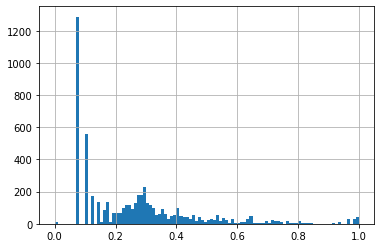

In [27]:
overlaid_gdf['adj_weight'].hist(bins=100)

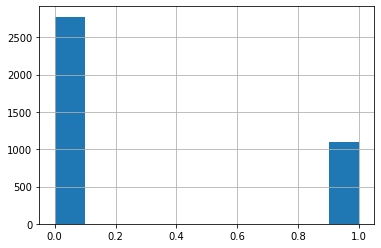

In [28]:
overlaid_gdf['truth_flag'].hist()
overlaid_gdf.to_file('test.geojson', driver='GeoJSON')

In [29]:
final_gdf = overlaid_gdf.dropna(axis=0, subset=['truth_flag'])

In [30]:
final_gdf

,datestamp,lat,lon,period,end_date,start_date,id,weight,geo_weight,polar_weight,adj_weight,sat_date,geometry,truth_flag
64,20/7/2019,-0.126831,101.696714,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,1.0,0.212258,0.032258,0.18000,0.460715,20/07/2019,"POLYGON ((11320606.290 -12636.816, 11320679.39...",1.0
65,20/7/2019,-0.124976,101.709003,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,1.0,0.212258,0.032258,0.18000,0.460715,20/07/2019,"POLYGON ((11320877.307 -13195.474, 11320947.17...",1.0
72,25/7/2019,-0.127913,101.708152,0 days 00:00:00.000000000,25/7/2019 0:00,25/7/2019 0:00,1.0,0.043011,0.043011,0.00000,0.207390,25/07/2019,"POLYGON ((11321023.737 -13195.474, 11321039.08...",1.0
120,5/7/2019,-0.140588,101.720364,0 days 00:00:00.000000000,5/7/2019 0:00,5/7/2019 0:00,1.0,0.100000,0.000000,0.10000,0.316228,05/07/2019,"POLYGON ((11321976.873 -15868.257, 11321966.33...",1.0
131,25/7/2019,-0.127913,101.708152,0 days 00:00:00.000000000,25/7/2019 0:00,25/7/2019 0:00,1.0,0.026882,0.026882,0.00000,0.163956,25/07/2019,"POLYGON ((11321976.873 -15733.164, 11321952.72...",1.0
132,25/7/2019,-0.132241,101.698337,0 days 00:00:00.000000000,25/7/2019 0:00,25/7/2019 0:00,1.0,0.026882,0.026882,0.00000,0.163956,25/07/2019,"POLYGON ((11321976.873 -15864.027, 11321958.67...",1.0
133,25/7/2019,-0.163310,101.704597,0 days 00:00:00.000000000,25/7/2019 0:00,25/7/2019 0:00,1.0,0.026882,0.026882,0.00000,0.163956,25/07/2019,"POLYGON ((11320583.202 -17185.324, 11320643.32...",1.0
142,20/7/2019,-0.126831,101.696714,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,1.0,0.016129,0.016129,0.00000,0.127000,20/07/2019,"POLYGON ((11321869.353 -15195.474, 11321778.00...",1.0
143,20/7/2019,-0.137187,101.699419,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,1.0,0.016129,0.016129,0.00000,0.127000,20/07/2019,"POLYGON ((11321976.873 -16506.984, 11321960.89...",1.0
144,20/7/2019,-0.124976,101.709003,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,1.0,0.016129,0.016129,0.00000,0.127000,20/07/2019,"POLYGON ((11321976.873 -15394.586, 11321901.74...",1.0


In [31]:
from sklearn import metrics
y = final_gdf['truth_flag'].values.astype(int)
scores = final_gdf['adj_weight'].values.astype(float)
scores_polar = final_gdf['polar_weight'].values.astype(float)
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)

In [32]:
print (fpr, tpr, thresholds)

[0.         0.0014404  0.0018005  0.00252071 0.00252071 0.00252071
 0.00288081 0.00324091 0.00360101 0.00396111 0.00432121 0.00504141
 0.00504141 0.00720202 0.00756212 0.00864242 0.00900252 0.00936262
 0.00972272 0.01044292 0.01080302 0.01116313 0.01116313 0.01152323
 0.01224343 0.01260353 0.01296363 0.01332373 0.01404393 0.01440403
 0.01512423 0.01548434 0.01836514 0.01872524 0.01872524 0.01908534
 0.01980555 0.02016565 0.02052575 0.02160605 0.02196615 0.02232625
 0.02268635 0.02304645 0.02448686 0.02448686 0.02484696 0.02592726
 0.02592726 0.02844797 0.02880807 0.02916817 0.02952827 0.02988837
 0.03168887 0.03168887 0.03204897 0.03276918 0.03384948 0.03456968
 0.03528988 0.03564998 0.03601008 0.03853079 0.03925099 0.03997119
 0.04105149 0.0414116  0.0421318  0.0424919  0.042852   0.0435722
 0.0446525  0.0450126  0.04573281 0.04609291 0.04645301 0.04681311
 0.04717321 0.04753331 0.04789341 0.04861361 0.04933381 0.05041412
 0.05113432 0.05185452 0.05221462 0.05257472 0.05293482 0.05437

In [ ]:
metrics.roc_auc_score(y, scores)

In [219]:
csi = 1/((1/(1-fpr)) + (1/tpr) - 1)
csi.argmax()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


259

In [220]:
csi[csi.argmax()], tpr[csi.argmax()], fpr[csi.argmax()]

(0.3663055685136232, 0.5952941176470589, 0.5122235157159488)

In [221]:
thresholds[csi.argmax()]

0.2936835031117683

In [222]:
csi.max()

0.3663055685136232

In [223]:
csi.shape, fpr.shape, tpr.shape

((314,), (314,), (314,))

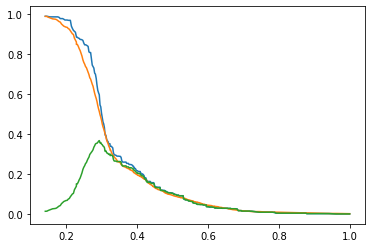

In [224]:
fig = plt.figure()
ax = plt.axes()

ax.plot(thresholds[1:-2], tpr[1:-2]);
ax.plot(thresholds[1:-2], fpr[1:-2]);
ax.plot(thresholds[1:-2], csi[1:-2]);